<a href="https://colab.research.google.com/github/mosesandrian/TensorFlowDeveloperCourse/blob/main/Course%201/TensorFlowDev_C1W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutions and Pooling**

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

2.4.1
4423680/4422102 [==============================] - 0s 0us/step


`training_images = training_images.reshape(60000, 28, 28, 1)`

We needed a tensor of four dimensions to start the convolutions. So instead of 60000 different items, its now 1 item with a dimension of 60000x28x28x1 for the training_images. Also for the test_images!

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):  # is set up on epoch_end, prevent fluctuations
    if(logs.get('accuracy')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

`tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1))`

**Conv2D** - generate **64** **3x3**-filters, that uses activation '**relu**' to eliminate negative values. **Input shape** is 28x28, with 1 as the color depth (grayscale only)


> 64 filters aren't picked at random. https://bit.ly/2UGa7uH

> try with something in the order of 32!






```
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
```

**MaxPooling2D** - taking maximum values of 2x2 pixels.
- uses another convolutional layer with MaxPooling2D, maximizing how the network might learn, pool to reduce the size

`model.summary()` -- looking through the journey of the layers. Keep an eye of the output shape column.
- negate 1 pixel margin, needs neighbor for Convolution Filter
- 5x5x64 - final value to be inputted to Flatten library. This provides better feature extraction and increase performance.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels) # this is for evaluating the data with test_images

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2493 - accuracy: 0.9092
Epoch 2

Be very careful with overfitting! Using more epochs means you might get awesome results in your training data. However, it might be too fit to the training data and not for your test data.

Convolution Exercises:

1. Try editing convolution number of filters: 16, 32, or 64. *(Impact on time/accuracy?)*

> 16 filters definitely provide faster computation time, rather than 32 or 64 filters.

2. Try removing the second convolution process *(Impact on time/accuracy?)*

> It's faster! and with 10 epochs it reaches 99.85% accuracy. With test accuracy of 98.78%

3. Try adding more convolution process *(Impact on time/accuracy?)*

> With 3 convolution and pooling steps, has similar training time, however, their accuracy steps from 76.1% on the 1st epoch to 94.9% on the 2nd.

> Don't use more convolutions than necessary. It didn't add too much of an effect to the end. (98.4% on training and 98.2% on test)

4. Try removing all convolutions but the first. *(Impact on time/accuracy?)*

>

5. Try callback!

> Done.

# **Visualization of Convolution and Pooling**

In [ ]:
print(test_labels[:100])

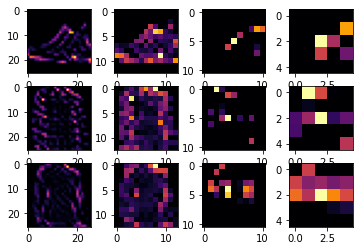

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER=1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input,
                                         outputs=layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap = 'inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap = 'inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER], cmap = 'inferno')
  axarr[2,x].grid(False)

# **Exercise 3 (Improve MNIST with Convolutions)**

In [ ]:
import tensorflow as tf
from os import path, getcwd, chdir

path = f"{getcwd()}/../tmp2/mnist.npz"

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

def train_mnist_conv():
  class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True
                
  callbacks=myCallback()

  mnist = tf.keras.datasets.mnist
  (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
  training_images = training_images.reshape(60000, 28, 28, 1)
  training_images = training_images / 255.0
  test_images = test_images.reshape(10000, 28, 28, 1)
  test_images = test_images / 255.0

  model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE
            tf.keras.layers.Conv2D(64,(3,3),activation='relu',
                                  input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
            # YOUR CODE ENDS HERE
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(
        # YOUR CODE STARTS HERE
        training_images, training_labels, epochs = 20, callbacks = [callbacks]
        # YOUR CODE ENDS HERE
  )
  return history.epoch, history.history['acc'][-1]

In [ ]:
_, _ = train_mnist_conv()